In [71]:
%matplotlib notebook
from skmultiflow.data import FileStream
from skmultiflow.data import SEAGenerator
from skmultiflow.trees import HoeffdingTree
from skmultiflow.trees import HAT
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.drift_detection import ADWIN
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.lazy import KNNADWINClassifier
import pandas as pd

In [16]:
df = pd.read_csv('IG-Dataset25.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.attack_cat=le.fit_transform(df.attack_cat)


df['dur'] = df['dur'].astype(int)
df['dinpkt'] = df['dinpkt'].astype(int)
df['sjit'] = df['sjit'].astype(int)

#df['attack_cat'] = df['attack_cat'].astype(int)

#df['Traffic Type'] = df['Traffic Type'].astype(int)
df.to_csv(r'C:\Users\lenovo\Desktop\desktop\streaming\mosab1-Dataset.csv', index=False)

In [72]:
stream = FileStream('mosab1-Dataset.csv',)
stream.prepare_for_use()

C:\Users\lenovo\anaconda3\lib\site-packages\skmultiflow\data\base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(


In [73]:
clf = [HAT( grace_period=400, split_criterion='gini', split_confidence=1e-09, tie_threshold=0.005), AdaptiveRandomForestClassifier(memory_estimate_period=1000000), KNNADWINClassifier()]

C:\Users\lenovo\anaconda3\lib\site-packages\skmultiflow\trees\hoeffding_adaptive_tree.py:16: FutureWarning: 'HAT' has been renamed to 'HoeffdingAdaptiveTreeClassifier' in v0.5.0.
The old name will be removed in v0.7.0
  warnings.warn("'HAT' has been renamed to 'HoeffdingAdaptiveTreeClassifier' in v0.5.0.\n"


In [74]:
eval = EvaluatePrequential(max_samples=10000, batch_size=1, n_wait=500,
                                output_file="HAT_automatic_test_041", show_plot=True,
                                metrics=['f1','running_time','model_size'])

<IPython.core.display.Javascript object>


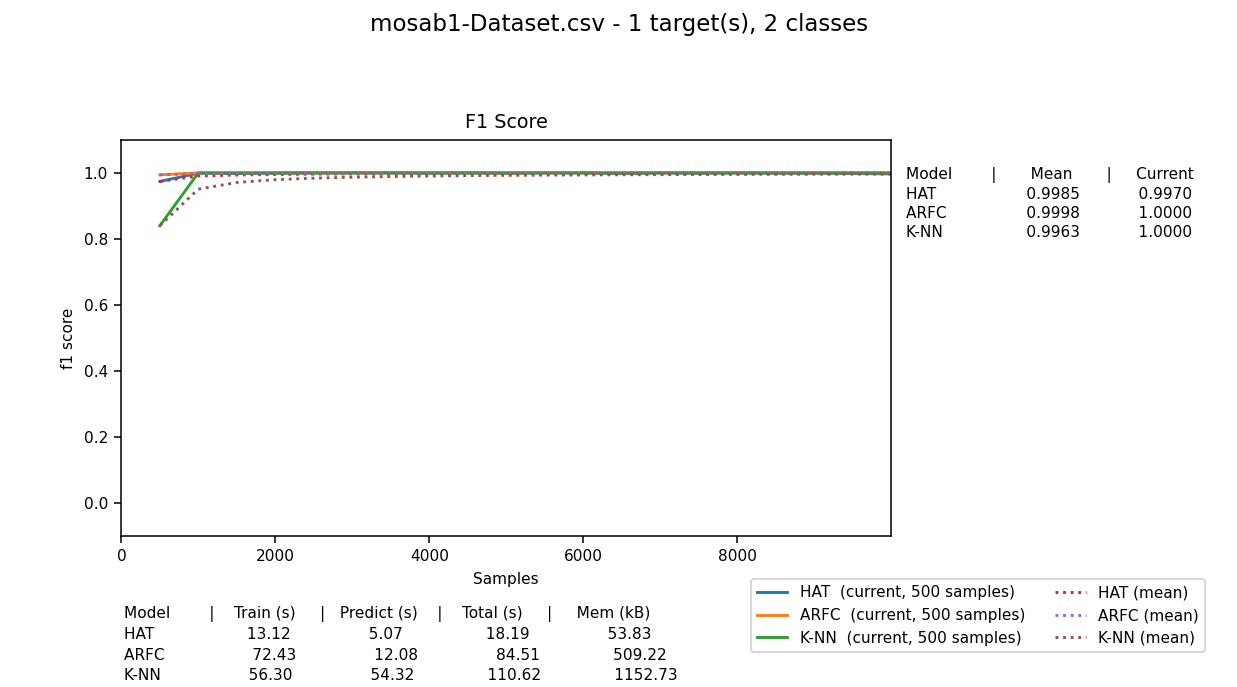

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [217.07s]
Processed samples: 10000
Mean performance:
HAT - F1 score: 0.9985
HAT - Training time (s)  : 13.12
HAT - Testing time  (s)  : 5.07
HAT - Total time    (s)  : 18.19
HAT - Size (kB)          : 53.8301
ARFC - F1 score: 0.9998
ARFC - Training time (s)  : 72.43
ARFC - Testing time  (s)  : 12.08
ARFC - Total time    (s)  : 84.51
ARFC - Size (kB)          : 509.2168
K-NN - F1 score: 0.9963
K-NN - Training time (s)  : 56.30
K-NN - Testing time  (s)  : 54.32
K-NN - Total time    (s)  : 110.62
K-NN - Size (kB)          : 1152.7314


[HoeffdingAdaptiveTreeClassifier(binary_split=False, bootstrap_sampling=True,
                                 grace_period=400, leaf_prediction='nba',
                                 max_byte_size=33554432,
                                 memory_estimate_period=1000000, nb_threshold=0,
                                 no_preprune=False, nominal_attributes=None,
                                 random_state=None, remove_poor_atts=False,
                                 split_confidence=1e-09, split_criterion='gini',
                                 stop_mem_management=False, tie_threshold=0.005),
 AdaptiveRandomForestClassifier(binary_split=False, disable_weighted_vote=False,
                                drift_detection_method=ADWIN(delta=0.001),
                                grace_period=50, lambda_value=6,
                                leaf_prediction='nba', max_byte_size=33554432,
                                max_features=5, memory_estimate_period=1000000,
              

In [75]:
eval.evaluate(stream=stream, model=clf,model_names=['HAT','ARFC','K-NN'])